In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

movs_df = pd.read_csv('desktop/independant_projects/Movie_score_predictor/IMDb_finalized.csv')

movs_df.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,154,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,589,7.0,7.0
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,5.8,188,5.0,2.0
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,446,25.0,3.0
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,2237,31.0,14.0


In [6]:
movs_df.dtypes

imdb_title_id            object
title                    object
year                      int64
date_published           object
genre                    object
duration                  int64
country                  object
language                 object
director                 object
avg_vote                float64
votes                     int64
reviews_from_users      float64
reviews_from_critics    float64
dtype: object

Year is already an integer. I want a numeric month column, so I'm going to need to process the date_published column to get the month. I'll need to loop through the column and split the date strings and then append the middle value to a data structure - probably just a list. 

In [12]:
#set up list
months = []

for date in movs_df['date_published']:
    date_list = date.split('-')
    months.append(date_list[1])

movs_df['month_published'] = months

movs_df = movs_df.astype({'month_published':'int64'})

movs_df.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics,month_published
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,154,1.0,2.0,10
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,589,7.0,7.0,12
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,5.8,188,5.0,2.0,8
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,446,25.0,3.0,11
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,2237,31.0,14.0,3


In [13]:
movs_df.dtypes

imdb_title_id            object
title                    object
year                      int64
date_published           object
genre                    object
duration                  int64
country                  object
language                 object
director                 object
avg_vote                float64
votes                     int64
reviews_from_users      float64
reviews_from_critics    float64
month_published           int64
dtype: object

C:\Users\gspah\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='month_published', ylabel='avg_vote'>

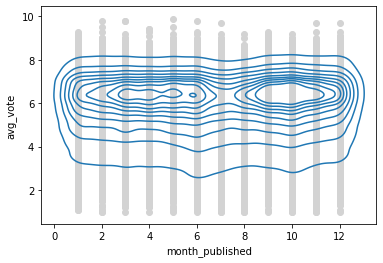

In [14]:
#is there any relationship between avg_vote and month_published?

plt.scatter(movs_df['month_published'], movs_df['avg_vote'], facecolors = 'lightgrey')
sns.kdeplot(movs_df['month_published'], movs_df['avg_vote'])

From the figure above, I can tell that there isn't really a correlation between the time of year and the quality. Also, that may not be the most graceful way to plot that data. In my last analysis we found a correlation between the genre designation and quality perception. Now I want to deconvolute the genre lables and engineer 3 new features - primary genre, subgenre, and genre complexity. Genre complexity will be defined as the number of genre labels. 

In [15]:
gen1 = []
gen2 = []
gen_c = []

for genre in movs_df['genre']:
    gen_list = genre.split(',')
    gen1.append(gen_list[0])
    gen_c.append(len(gen_list))
    if len(gen_list) > 1:
        gen2.append(gen_list[1])
    else:
        gen2.append('none')

movs_df['primary_genre'] = gen1

movs_df['subgenre1'] = gen2

movs_df['genre_complexity'] = gen_c

movs_df.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics,month_published,primary_genre,subgenre1,genre_complexity
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,154,1.0,2.0,10,Romance,none,1
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,589,7.0,7.0,12,Biography,Crime,3
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,5.8,188,5.0,2.0,8,Drama,none,1
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,446,25.0,3.0,11,Drama,History,2
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,2237,31.0,14.0,3,Adventure,Drama,3


In [17]:
#what does the genre complexity score look like for the data set?

movs_df['genre_complexity'].describe()

count    85855.000000
mean         2.048419
std          0.822677
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: genre_complexity, dtype: float64

In [18]:
#group by primary genre to see how many there are, and learn something about average scores

av_by_primary = movs_df.groupby('primary_genre').mean()

av_by_primary

,year,duration,avg_vote,votes,reviews_from_users,reviews_from_critics,month_published,genre_complexity
primary_genre,,,,,,,,
Action,1995.822935,107.124938,5.577409,21309.559432,88.730610,40.823070,6.523231,2.648990
Adult,1979.000000,96.500000,4.550000,689.500000,19.000000,40.000000,3.500000,3.000000
Adventure,1983.408447,99.118366,5.869881,14099.572103,61.460684,30.511335,6.788552,2.602390
Animation,2003.297438,87.363852,6.386575,22352.414611,63.784837,42.177348,6.832543,2.801708
Biography,1995.306725,113.995646,6.638413,21488.999516,79.317629,55.842918,6.382680,2.676826
Comedy,1993.215294,97.938799,5.877100,6435.003251,32.299340,21.617829,6.578796,1.975758
Crime,1986.485874,98.111931,6.103743,11601.185892,52.208388,29.605362,6.575490,2.608062
Documentary,2000.000000,88.500000,7.300000,615.500000,9.000000,11.500000,5.500000,2.000000
Drama,1994.035571,102.907508,6.268865,5617.644213,32.398164,22.677048,6.589656,1.687072


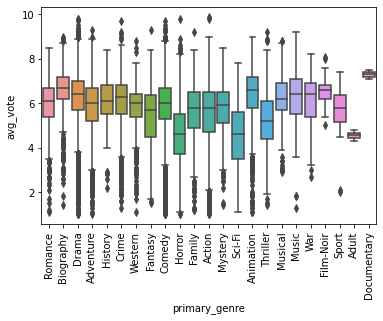

In [22]:
#violin plots using primary genre

gen1_scr = movs_df[['primary_genre', 'avg_vote']].copy()

sns.boxplot(x='primary_genre', y='avg_vote', data = gen1_scr)

plt.xticks(rotation = 90)

plt.show()